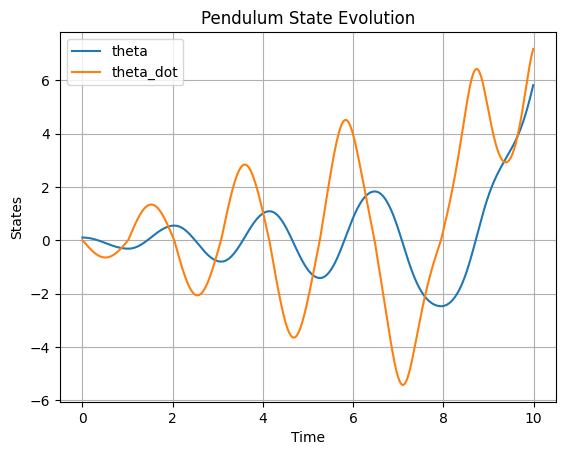

In [13]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# System dynamics
def pendulum_dynamics(theta, theta_dot, u):
    m = 1.0  # mass of the pendulum
    l = 1.0  # length of the pendulum
    g = 9.81  # acceleration due to gravity

    theta_double_dot = (u - m * g * l * np.sin(theta)) / (m * l**2)

    return theta_dot, theta_double_dot

# Control Lyapunov function (CLF)
def clf(theta, theta_dot):
    return 0.5 * theta_dot**2 + 9.81 * np.cos(theta)

# CLF time derivative
def clf_derivative(x, u):
    theta_dot = x[1]
    theta_double_dot = pendulum_dynamics(x[0], x[1], u)[1]

    return -theta_dot * theta_double_dot

# Pendulum simulation
def simulate_pendulum(x0, controller, dt, T):
    t = np.arange(0, T, dt)
    x = np.zeros((len(t), len(x0)))
    x[0] = x0

    for i in range(1, len(t)):
        u = controller(x[i-1])
        theta_dot, theta_double_dot = pendulum_dynamics(x[i-1, 0], x[i-1, 1], u)
        x[i] = x[i-1] + dt * np.array([theta_dot, theta_double_dot])

    return t, x

# Optimization-based control
def control_pendulum(x):
    u = cp.Variable()
    clf_dot = clf_derivative(x, u)

    # Optimization problem
    objective = cp.Minimize(clf_dot)
    constraints = [u >= -1, u <= 1]  # Control constraints

    prob = cp.Problem(objective, constraints)
    prob.solve()

    if prob.status == cp.OPTIMAL:
        return u.value
    else:
        return 0.0

# Simulation parameters
x0 = np.array([0.1, 0.0])  # Initial state
dt = 0.01  # Time step
T = 10.0  # Total simulation time

# Simulate and control the pendulum
t, x = simulate_pendulum(x0, control_pendulum, dt, T)

# Plot the results
plt.figure()
plt.plot(t, x[:, 0], label='theta')
plt.plot(t, x[:, 1], label='theta_dot')
plt.xlabel('Time')
plt.ylabel('States')
plt.legend()
plt.title('Pendulum State Evolution')
plt.grid(True)
plt.show()


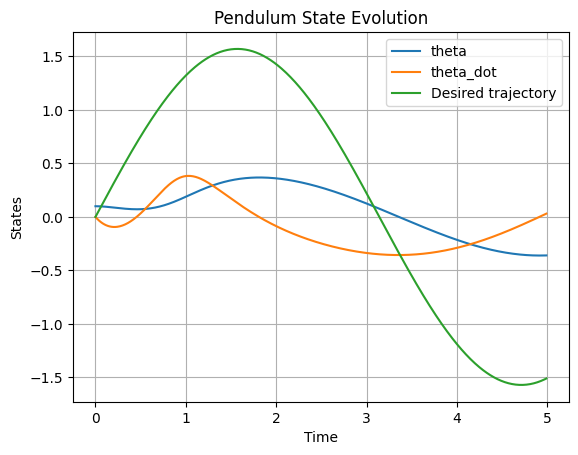

In [14]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# System dynamics
def pendulum_dynamics(theta, theta_dot, u):
    m = 1.0  # mass of the pendulum
    l = 1.0  # length of the pendulum
    g = 9.81  # acceleration due to gravity

    theta_double_dot = (u - m * g * l * np.sin(theta)) / (m * l**2)

    return theta_dot, theta_double_dot

# Control Lyapunov function (CLF)
def clf(theta, theta_dot):
    return 0.5 * theta_dot**2 + 9.81 * np.cos(theta)

# Desired trajectory
def desired_trajectory(t):
    return np.pi / 2 * np.sin(t)

# CLF time derivative
def clf_derivative(x, u):
    theta_dot = x[1]
    theta_double_dot = pendulum_dynamics(x[0], x[1], u)[1]

    return -theta_dot * theta_double_dot

# Pendulum simulation
def simulate_pendulum(x0, controller, dt, T):
    t = np.arange(0, T, dt)
    x = np.zeros((len(t), len(x0)))
    x[0] = x0

    for i in range(1, len(t)):
        u = controller(x[i-1], t[i])
        theta_dot, theta_double_dot = pendulum_dynamics(x[i-1, 0], x[i-1, 1], u)
        x[i] = x[i-1] + dt * np.array([theta_dot, theta_double_dot])

    return t, x

# Optimization-based control
def control_pendulum(x, t):
    u = cp.Variable()
    clf_dot = clf_derivative(x, u)

    # Desired trajectory
    theta_desired = desired_trajectory(t)

    # Control law
    u_desired = -clf_dot - 2 * (x[1] - theta_desired)

    # Optimization problem
    objective = cp.Minimize(cp.square(u - u_desired))
    constraints = [u >= -10, u <= 10]  # Control constraints

    prob = cp.Problem(objective, constraints)
    prob.solve()

    if prob.status == cp.OPTIMAL:
        return u.value
    else:
        return 0.0

# Simulation parameters
x0 = np.array([0.1, 0.0])  # Initial state
dt = 0.01  # Time step
T = 5.0  # Total simulation time

# Simulate and control the pendulum
t, x = simulate_pendulum(x0, control_pendulum, dt, T)

# Plot the results
plt.figure()
plt.plot(t, x[:, 0], label='theta')
plt.plot(t, x[:, 1], label='theta_dot')
plt.plot(t, desired_trajectory(t), label='Desired trajectory')
plt.xlabel('Time')
plt.ylabel('States')
plt.legend()
plt.title('Pendulum State Evolution')
plt.grid(True)
plt.show()


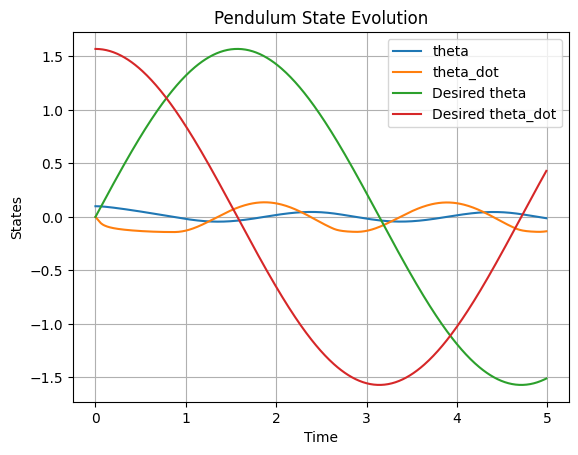

In [66]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# System dynamics
def pendulum_dynamics(theta, theta_dot, u):
    m = 1.0  # mass of the pendulum
    l = 1.0  # length of the pendulum
    g = 9.81  # acceleration due to gravity
    theta_double_dot = (u - m * g * l * np.sin(theta)) / (m * l**2)
    return theta_dot, theta_double_dot

# Control Lyapunov function (CLF)
def clf(theta, theta_dot):
    x = np.array([theta, theta_dot])
    return 0.5*(x.T@x)

# Desired trajectories
def desired_trajectory(t):
    theta_desired = np.pi / 2 * np.sin(t)
    theta_dot_desired = np.pi / 2 * np.cos(t)
    theta_double_dot_desired = -(np.pi / 2) * np.sin(t)
    return theta_desired, theta_dot_desired, theta_double_dot_desired

# CLF time derivative
def clf_derivative(x, u):
    theta_dot = x[1]
    theta_double_dot = pendulum_dynamics(x[0], x[1], u)[1]
    
    x_dot = np.array([theta_dot, theta_double_dot])
    return (x.T@x_dot)

# Pendulum simulation
def simulate_pendulum(x0, controller, dt, T):
    t = np.arange(0, T, dt)
    x = np.zeros((len(t), len(x0)))
    x[0] = x0

    for i in range(1, len(t)):
        u = controller(x[i-1], t[i])
        theta_dot, theta_double_dot = pendulum_dynamics(x[i-1, 0], x[i-1, 1], u)
        x[i] = x[i-1] + dt * np.array([theta_dot, theta_double_dot])

    return t, x

# Optimization-based control
def control_pendulum(x, t):
    u = cp.Variable()
    clf_dot = clf_derivative(x, u)
    clf_ = clf(x[0],x[1])
    lam = 10
    # Desired trajectories
    theta_desired, theta_dot_desired, theta_double_dot_desired = desired_trajectory(t)

    # Control laws
    error_theta = theta_desired-x[0]
    error_theta_dot = theta_dot_desired-x[1]
    k_p = 100
    k_d = 10
    u_ref = theta_double_dot_desired - k_p*error_theta - k_d*error_theta_dot
    p = 1
    delta = 0.1

    # # Optimization problem
    # objective = cp.Minimize((cp.square(u-u_ref)+p*cp.square(delta)))

    u_desired = -clf_dot 

    # Optimization problem
    objective = cp.Minimize(cp.square(u - u_desired)+cp.square(delta))
    constraints = [clf_dot + lam*clf_<=delta,u<=10000, u>=-10000]  # Control constraints

    prob = cp.Problem(objective, constraints)
    prob.solve()

    if prob.status == cp.OPTIMAL:
        return u.value
    else:
        return 0

# Simulation parameters
x0 = np.array([0.1, 0.0])  # Initial state
dt = 0.01  # Time step
T = 5.0  # Total simulation time

# Simulate and control the pendulum
t, x = simulate_pendulum(x0, control_pendulum, dt, T)

# Desired trajectories
theta_desired, theta_dot_desired, theta_double_dot_desired = desired_trajectory(t)


# Plot the results
plt.figure()
plt.plot(t, x[:, 0], label='theta')
plt.plot(t, x[:, 1], label='theta_dot')
plt.plot(t, theta_desired, label='Desired theta')
plt.plot(t, theta_dot_desired, label='Desired theta_dot')
plt.xlabel('Time')
plt.ylabel('States')
plt.legend()
plt.title('Pendulum State Evolution')
plt.grid(True)
plt.show()


In [3]:
import numpy as np
from sympy import symbols, lambdify
from sympy import Matrix
import time
import cvxpy as cp

class CLFControls:
    def __init__(self, sym_x, sym_f, sym_g, sym_clf, rate=0.1):
        if sym_x is None or sym_f is None or sym_g is None:
            raise ValueError('x, f, g is empty. Create a class function defineSystem and define your dynamics with symbolic expression.')
        
        # if the sym_f, sym_g are not in the form of sympy.Matrix, convert them
        if not isinstance(sym_f, Matrix):
            f_ = Matrix(sym_f)
        else:
            f_ = sym_f
        if not isinstance(sym_g, Matrix):
            g_ = Matrix(sym_g)
        else:
            g_ = sym_g
            x  = sym_x
        #CLF rate
        self.clf_rate = rate

        #setting state and input dimension
        self.x_dim = len(x)
        self.u_dim = len(g_.T)

        #setting f and g as a function
        self.f = lambdify((x), f_, modules='numpy')
        self.g = lambdify((x), g_, modules='numpy')

        #obtaining the lie derivatives of the CLF
        #if sym_clf is not empty, then calculate the lie derivatives and simplify them
        if sym_clf is not None:
            #evalute jacobian wrt x and simplify
            d_clf = sym_clf.jacobian(x)
            d_clf = d_clf.simplify()
            lf_clf_ = d_clf*f_
            lg_clf = d_clf*g_
            self.clf = lambdify((x), sym_clf, modules='numpy')
            self.lf_clf = lambdify((x), lf_clf_, modules='numpy')
            self.lg_clf = lambdify((x), lg_clf, modules='numpy')
        
    
    #Implementation of vanilla CLF-QP
    #Inputs:   x: state
    #          u_ref: reference control input
    #          with_slack: flag for relaxing (1: relax, 0: hard CLF constraint)
    #          verbose: flag for logging (1: print log, 0: run silently)
    #Outputs:  u: control input as a solution of the CLF-QP
    #          slack: slack variable for relaxation. (empty list when with_slack=0)
    #          V: Value of the CLF at the current state.
    #          feas: 1 if QP is feasible, 0 if infeasible. (Note: even
    #          when qp is infeasible, u is determined from quadprog.)
    #          comp_time: computation time to run the solver.
    def clf_qp(self, x, u_ref, with_slack=0):
        # if the clf is empty raise error that it cannot be used
        if self.clf is None:
            raise ValueError('clf is empty. Create a class function defineSystem and define your dynamics with symbolic expression.')
        #if the u_ref is empty, set it to zero
        if u_ref is None:
            u_ref = np.zeros(self.u_dim)
        #if the with_slack is empty, set it to 1
        if with_slack is None:
            with_slack = 1
        
        #if the length of u_ref is not equal to u_dim, raise error
        if len(u_ref) != self.u_dim:
            raise ValueError('u_ref is not the same dimension as the input dimension of the system.')

        tstart = time.time()
        V = self.clf(x)
        lf_V = self.lf_clf(x)
        lg_V = self.lg_clf(x)

        #constraints : A[u;slack] <= b
        if with_slack:
            #CLF constraint
            A = np.hstack((lg_V, -np.ones((lg_V.shape[0], 1))))
            b = -lf_V - self.clf_rate*V
            # add input contstraint if u_max and u_min are defined
            if self.u_max is not None:
                A = np.vstack((A, np.hstack((np.eye(self.udim), np.zeros((self.udim, 1))))))
                if self.u_max.shape[0] == 1:
                    b = np.vstack((b, np.tile(self.u_max, (self.udim, 1))))
                elif self.u_max.shape[0] == self.udim:
                    b = np.vstack((b, self.u_max))
                else:
                    raise ValueError("u_max should be either a scalar value or an (udim, 1) array.")
            if self.u_min in self.params:
                A = np.vstack((A, -np.eye(self.udim), np.zeros((self.udim, 1))))
                if self.u_min.shape[0] == 1:
                    b = np.vstack((b, -self.u_min * np.ones((self.udim, 1))))
                elif self.u_min.shape[0] == self.udim:
                    b = np.vstack((b, -self.u_min))
                else:
                    raise ValueError("u_min should be either a scalar value or an (udim, 1) array.")
        else:
            A = lg_V
            b = -lf_V - self.clf_rate*V
            # add input contstraint if u_max and u_min are defined
            if self.u_max is not None:
                A = np.vstack((A, np.eye(self.udim)))
                if self.u_max.shape[0] == 1:
                    b = np.vstack((b, np.tile(self.u_max, (self.udim, 1))))
                elif self.u_max.shape[0] == self.udim:
                    b = np.vstack((b, self.u_max))
                else:
                    raise ValueError("u_max should be either a scalar value or an (udim, 1) array.")
            if self.u_min is not None:
                A = np.vstack((A, -np.eye(self.udim)))
                if self.u_min.shape[0] == 1:
                    b = np.vstack((b, -self.u_min * np.ones((self.udim, 1))))
                elif self.u_min.shape[0] == self.udim:
                    b = np.vstack((b, -self.u_min))
                else:
                    raise ValueError("u_min should be either a scalar value or an (udim, 1) array.")
            
        #cost function: 1/2*[u;slack]'*H*[u;slack] + f'*[u;slack]
        # H = [weight_input, zeros(obj.udim, 1);
        #     zeros(1, obj.udim), obj.params.weight.slack];
        # f_ = [-weight_input * u_ref; 0];
        H = np.zeros((self.u_dim+1, self.u_dim+1))
        H[:self.u_dim, :self.u_dim] = self.weight_input
        H[self.u_dim, self.u_dim] = self.params.weight.slack
        f_ = np.zeros((self.u_dim+1, 1))
        f_[:self.u_dim] = -self.weight_input * u_ref
        # solve QP
        u, slack, feas = self.solve_qp(H, f_, A, b)
        # if the QP is infeasible, set u to the solution of the unconstrained QP
        if feas == 0:
            u, slack, feas = self.solve_qp(H, f_, None, None)
        # if the QP is still infeasible, set u to the reference input
        if feas == 0:
            u = u_ref
        # if the QP is feasible, but the slack variable is negative, set u to the reference input
        elif slack < 0:
            u = u_ref
        # if the QP is feasible, but the slack variable is positive, set u to the solution of the unconstrained QP
        elif slack > 0:
            u, slack, feas = self.solve_qp(H, f_, None, None)
            # if the QP is infeasible, set u to the reference input
            if feas == 0:
                u = u_ref
        # if the QP is feasible, but the slack variable is zero, do nothing
        else:
            pass
        # compute the computation time
        comp_time = time.time() - tstart
        return u, feas, comp_time
    
    # % solve_qp: solve a quadratic program with linear inequality constraints using cvxpy
    def solve_qp(self, H, f, A, b):
        # define the variable
        u = cp.Variable((self.u_dim, 1))
        slack = cp.Variable((1, 1))
        # define the cost function
        cost = 0.5 * cp.quad_form(u, H) + f.T @ u
        # define the constraints
        constraints = []
        if A is not None:
            constraints += [A @ cp.vstack((u, slack)) <= b]
        # define the problem
        prob = cp.Problem(cp.Minimize(cost), constraints)
        # solve the problem
        prob.solve()
        # return the solution
        return u.value, slack.value, prob.status
